In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 
        'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
cats = ['Education', 'Marital_Status']
timestamp = ['Dt_Customer']

In [7]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [8]:
df[cats].describe()

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [9]:
df[timestamp].describe()

,Dt_Customer
count,2240
unique,663
top,2012-08-31
freq,12


### Handling Missing Value

In [10]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
# handling missing value pada Income (imputasi nilai median)
df['Income'].fillna(df['Income'].median(), inplace = True)

In [12]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Dataset sudah tidak memiliki nilai missing value

### Handling Duplicate Data

In [13]:
df.duplicated().sum()

0

Tidak ditemukan data duplicate pada dataset

### Handling Outlier

In [30]:
# IQR
# print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

# filtered_entries = np.array([True] * len(df))
# for col in ['Year_Birth', 'Income']:
    # Q1 = df[col].quantile(0.25)
    # Q3 = df[col].quantile(0.75)
    # IQR = Q3 - Q1
    # low_limit = Q1 - (IQR * 1.5)
    # high_limit = Q3 + (IQR * 1.5)

    # filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
# df = df[filtered_entries]

# print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Handling outlier yang digunakan yaitu menggunakan Z_Score karena dataset yang dimiliki terlalu sedikit

In [14]:
# Handling Outlier Menggunakan Z-Score
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['Year_Birth','Income']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 2240
Jumlah baris setelah memfilter outlier: 2229


In [16]:
import math

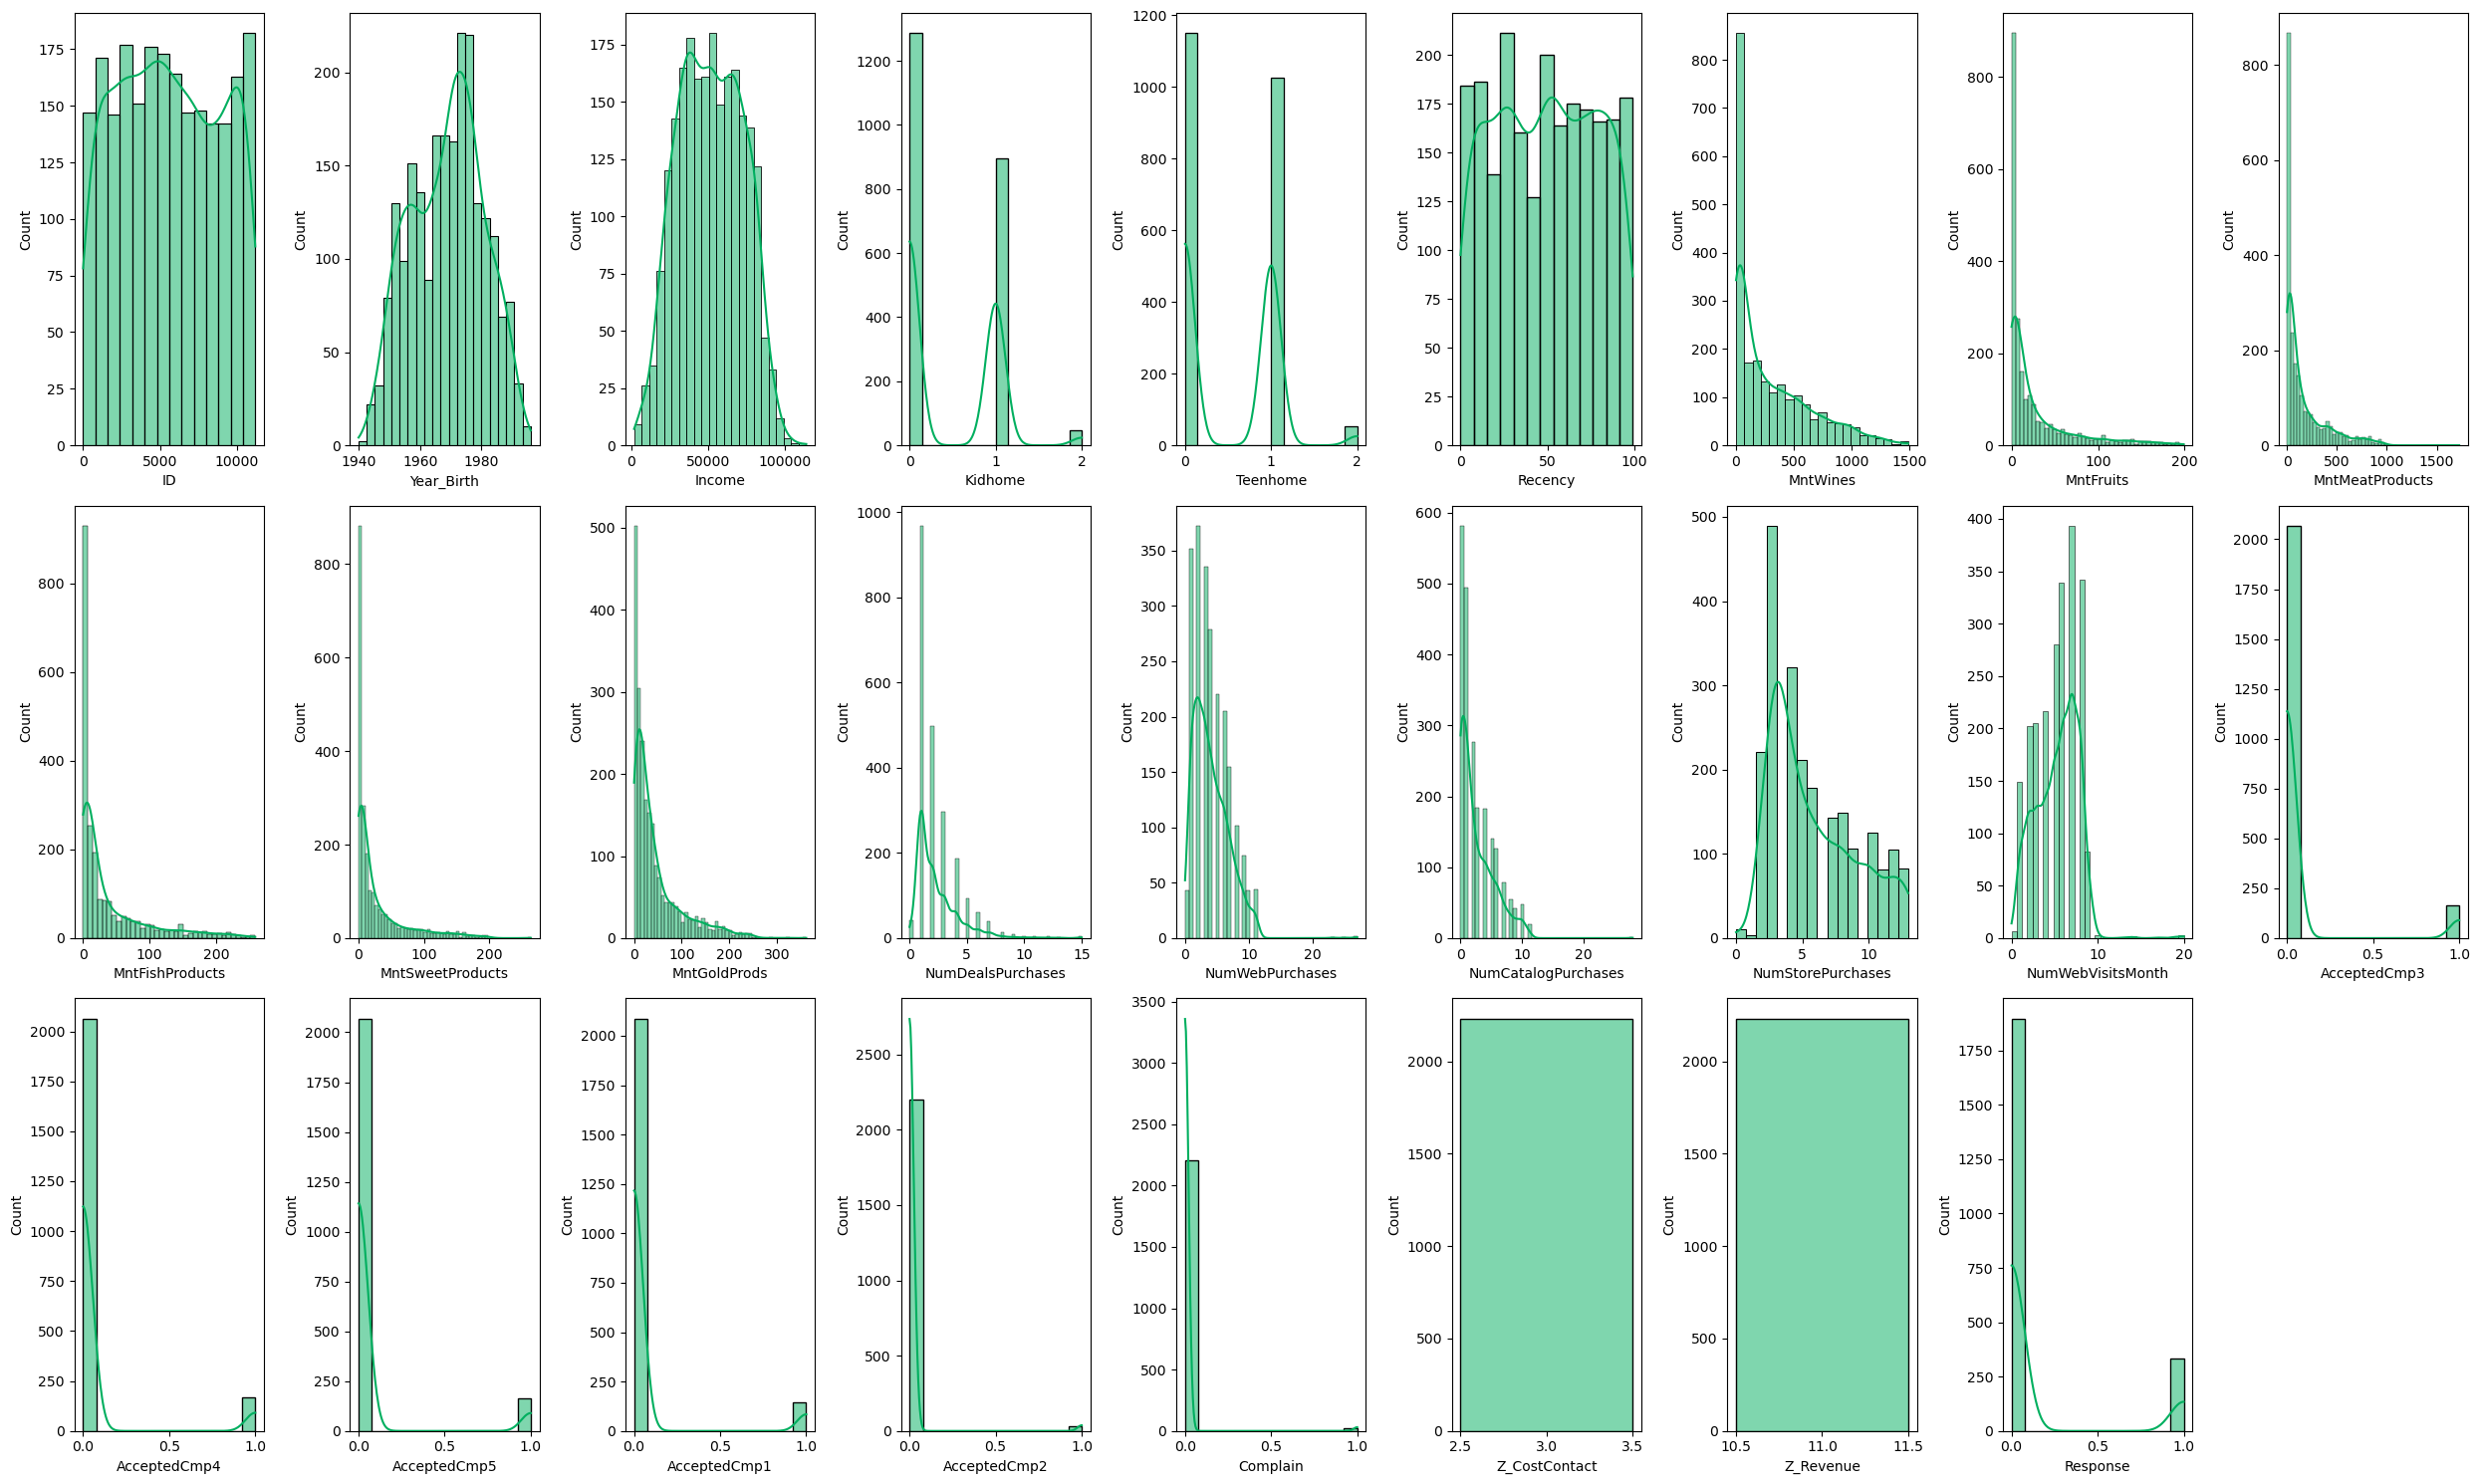

In [23]:
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(nums)):
    plt.subplot(n, math.ceil(len(nums)/n), i+1) 
    sns.histplot(df[nums[i]], color='#00af5f', kde=True)
    plt.tight_layout()

### Melakukan Log Trasformation pada Positively Skewed

In [24]:
positive_skewed = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                   'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases']

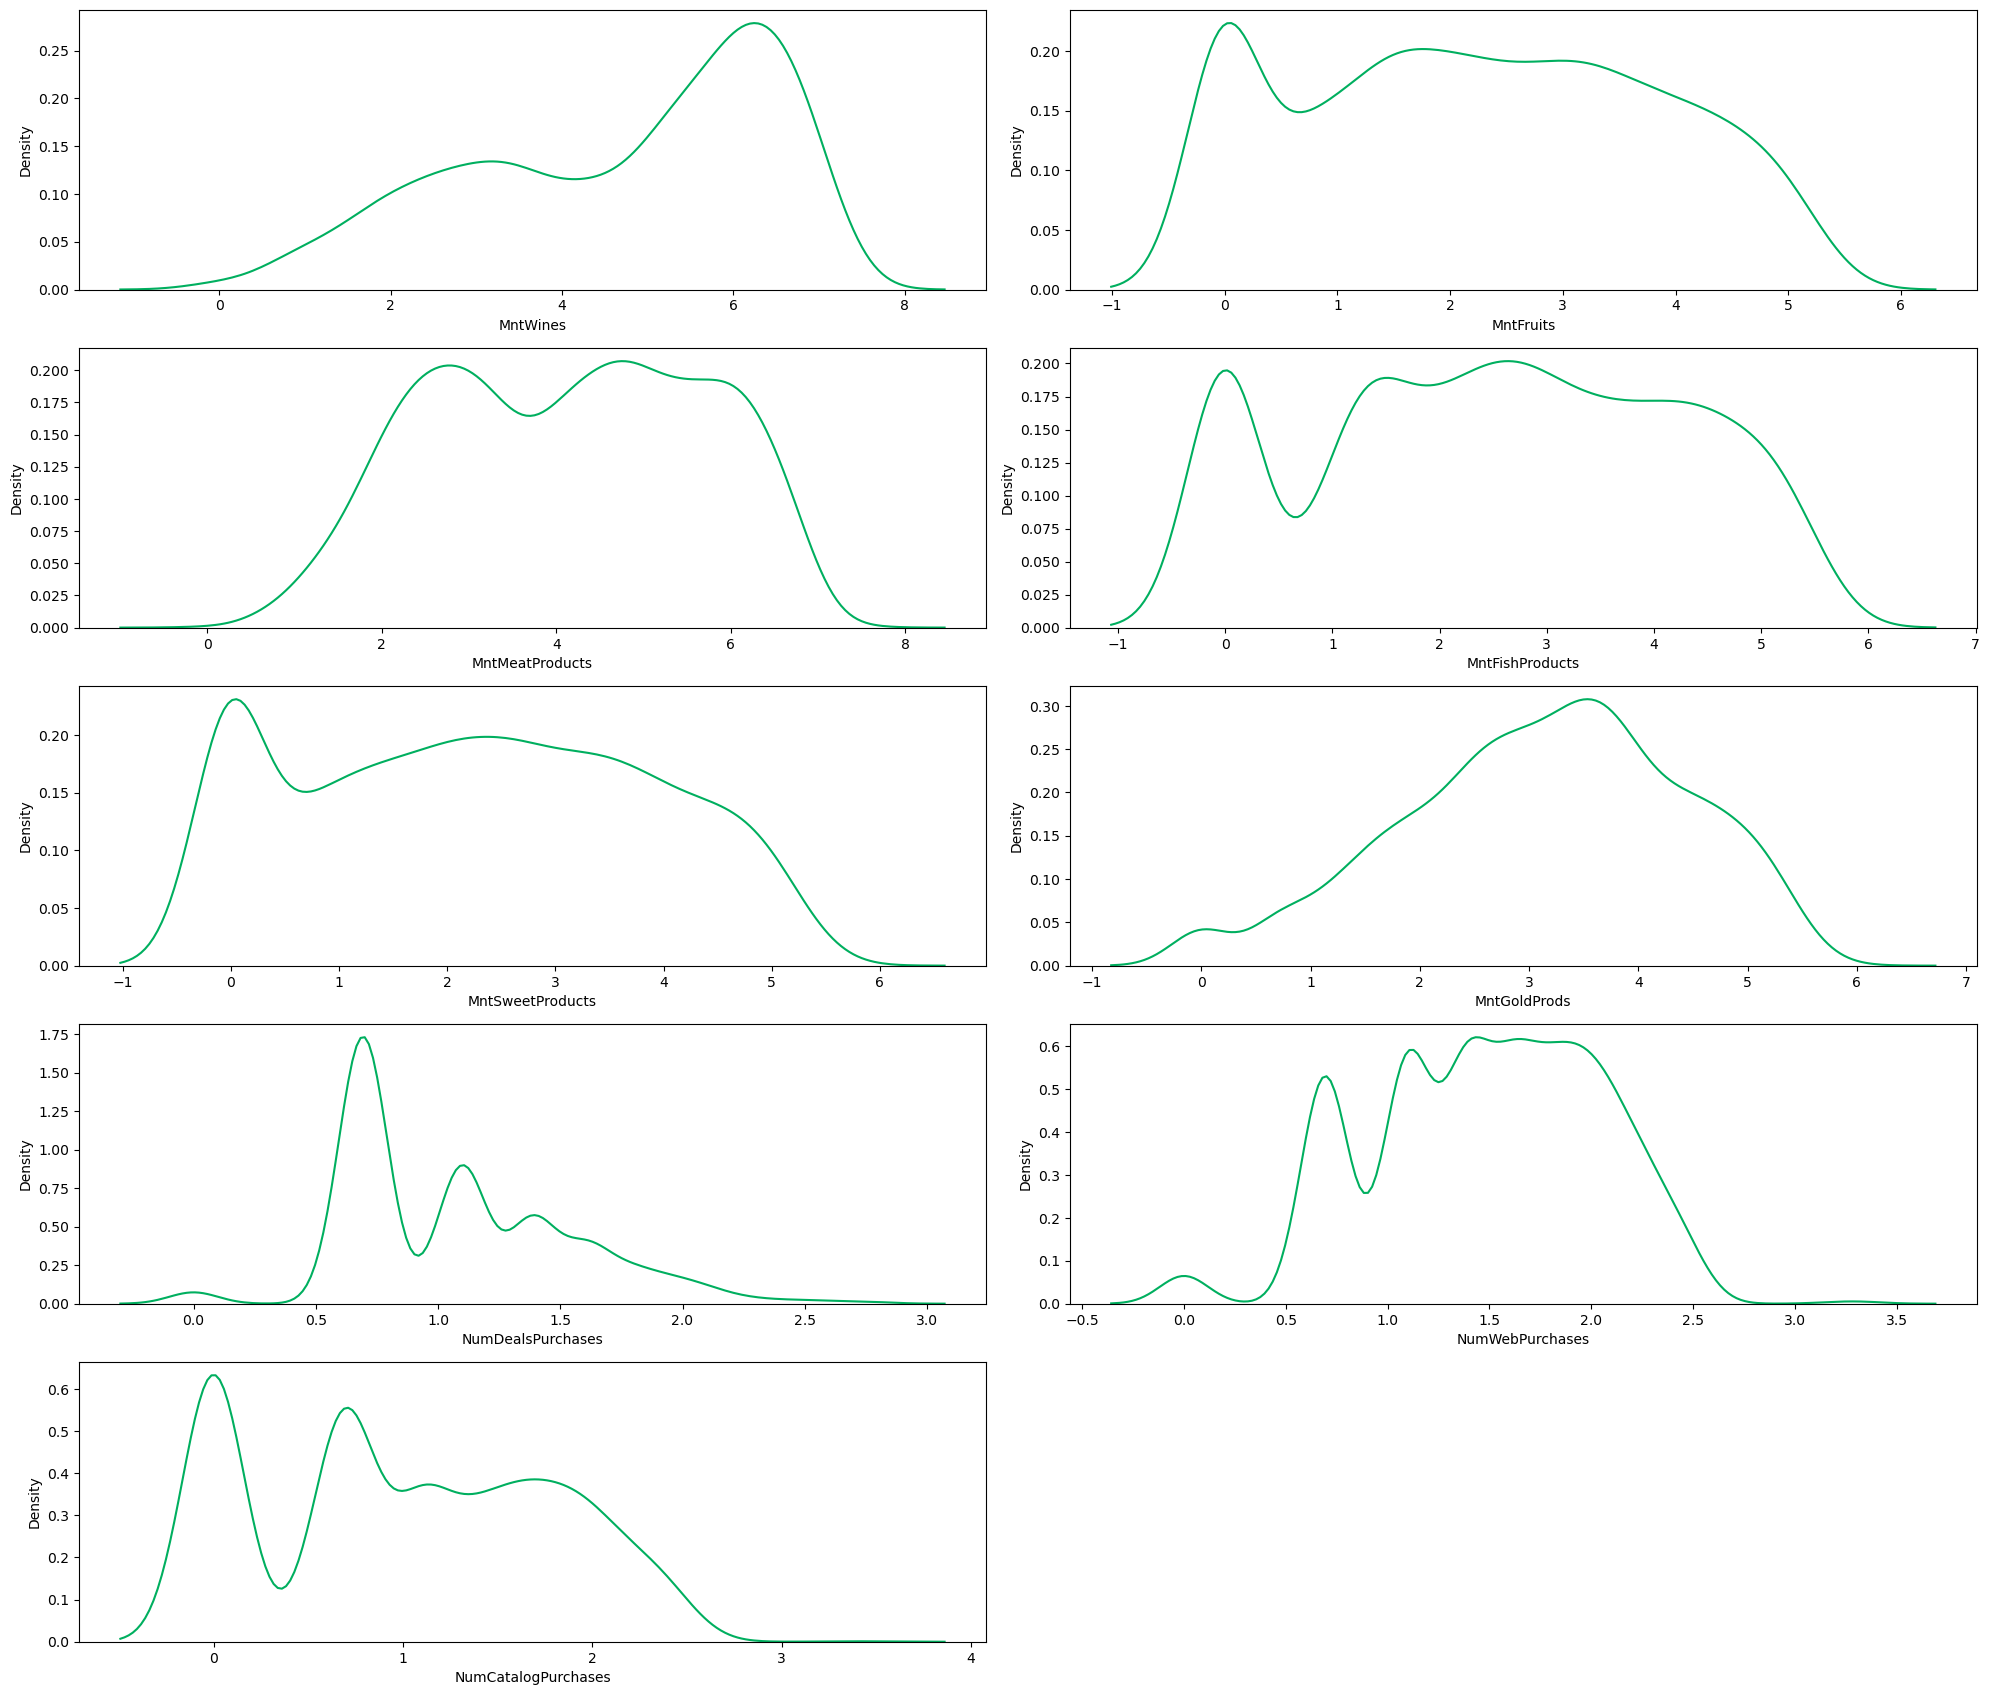

In [ ]:
# Melakukan log transformation pada positively skewed
plt.figure(figsize=(20,20))
for i in range(0, len(positive_skewed)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(np.log(df[positive_skewed[i]]+1), color='#00af5f')
    plt.tight_layout()

### Feature Extraction/Feature Engineering

In [27]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [28]:
# Membuat Kolom Umur (Age)
# SAS Institute, 2014
# currentYear = datetime.now().year
currentYear = 2014 # based on data
df['Age'] = currentYear - df['Year_Birth']

In [29]:
def age_group(x):
    if x > 45:
        grup = 'Senior Adult'
    elif x > 30:
        grup = 'Adult'
    else:
        grup = 'Young Adult'
    
    return grup

df['Age_group'] = df["Age"].apply(lambda x: age_group(x))

In [30]:
# Membuat Kolom Has a Child
df['Has_child'] = np.where(df["Kidhome"]+df["Teenhome"] > 0, 1, 0)

In [31]:
# Membuat Kolom Dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']

In [32]:
# Membuat Kolom Lifetime
df['Lifetime'] = (2014 - df.Dt_Customer.dt.year)*12 + df.Dt_Customer.dt.month

In [33]:
# Membuat Kolom Spending
df['Spending']=df['MntWines']+ \
    df['MntFruits']+ \
    df['MntMeatProducts']+ \
    df['MntFishProducts']+ \
    df['MntSweetProducts']+ \
    df['MntGoldProds']

In [34]:
# Membuat kolom primer and tersier product
df['Primer_purchase'] = df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']
df['Tersier_purchase'] = df['MntWines']+df['MntSweetProducts']+df["MntGoldProds"]

In [35]:
# Membuat Total Purchases
df['Total_Purchases'] = df['NumDealsPurchases'] + \
    df['NumWebPurchases'] + \
    df['NumCatalogPurchases'] + \
    df['NumStorePurchases']

In [36]:
# Membuat Total Cmp
df['Total_Cmp']=df['AcceptedCmp1'].astype("int64")+ \
    df['AcceptedCmp2'].astype("int64")+ \
    df['AcceptedCmp3'].astype("int64")+ \
    df['AcceptedCmp4'].astype("int64")+ \
    df['AcceptedCmp5'].astype("int64")

In [37]:
df['Ever_Accept']=df['Total_Cmp'].apply(lambda x : 1 if x >= 1 else 0)

In [38]:
# total revenue
df['Total_revenue'] = (df['Total_Cmp']) * df['Z_Revenue']
df[['Z_Revenue', 'Total_revenue']].sample(5)

,Z_Revenue,Total_revenue
1655,11,0
841,11,0
1657,11,0
1223,11,11
645,11,0


In [39]:
# Mengganti kategori 'Absurd' dan 'YOLO' menjadi 'Others'
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd', 'YOLO'],'Others')
# Mengganti kategori 'Alone' menjadi 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Alone'],'Single')
# Mengganti kategori 'Together' menjadi 'Married'
df['Marital_Status'] = df['Marital_Status'].replace(['Together'],'Married')

In [40]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced', 'Widow', 'Others'], dtype=object)

In [41]:
# Levels : Basic - Graduation - 2n Cycle - Master - PhD
df['Education'] = df['Education'].replace(['2n Cycle'],'Master')

In [42]:
Q1 = df["Income"].quantile(.25)
print(Q1)
Q3 = df["Income"].quantile(.75)
print(Q3)

def income_sgmt(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

df["Income_sgmt"] = df["Income"].fillna("None")
df["Income_sgmt"] = df["Income_sgmt"].apply(lambda x: income_sgmt(x))

35416.0
68118.0


In [43]:
df["Income_sgmt"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [44]:
df['Conversion_rate_web'] = np.round(df['Total_Purchases'] / df['NumWebVisitsMonth'], 2)
df['Conversion_rate_web'].fillna(0, inplace=True)
df['Conversion_rate_web'].replace([np.inf, -np.inf], 0, inplace=True)

In [45]:
df['Year_joined'] = df['Dt_Customer'].dt.year
df['Month_joined'] = df['Dt_Customer'].dt.month

In [46]:
# Mengecek nilai extraction
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Primer_purchase,Tersier_purchase,Total_Purchases,Total_Cmp,Ever_Accept,Total_revenue,Income_sgmt,Conversion_rate_web,Year_joined,Month_joined
2207,4333,1954,Graduation,Married,32144.0,1,1,2014-03-23,76,41,...,10,44,10,1,1,11,Low,1.43,2014,3
107,2683,1969,Graduation,Married,52413.0,0,2,2013-02-02,56,295,...,452,458,26,0,0,0,Medium,4.33,2013,2
1115,4356,1971,Graduation,Married,71819.0,0,1,2013-08-28,70,1224,...,168,1406,14,2,1,22,High,2.33,2013,8
510,9925,1981,PhD,Married,39665.0,1,0,2013-05-25,97,127,...,57,159,12,1,1,11,Medium,1.71,2013,5
739,5564,1969,Graduation,Married,62882.0,0,1,2012-08-09,26,509,...,708,630,20,0,0,0,Medium,5.00,2012,8


### Feature Selection 1

In [47]:
# Drop ID, Year_birt, Z_CostContact, Z_Revenue (karena sudah di-encoding)
df_new = df.drop(columns=['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']).copy()

In [48]:
# Dataframe setelah drop kolom ID, Year_birt, Z_CostContact, Z_Revenue
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2229 non-null   object 
 1   Marital_Status       2229 non-null   object 
 2   Income               2229 non-null   float64
 3   Kidhome              2229 non-null   int64  
 4   Teenhome             2229 non-null   int64  
 5   Recency              2229 non-null   int64  
 6   MntWines             2229 non-null   int64  
 7   MntFruits            2229 non-null   int64  
 8   MntMeatProducts      2229 non-null   int64  
 9   MntFishProducts      2229 non-null   int64  
 10  MntSweetProducts     2229 non-null   int64  
 11  MntGoldProds         2229 non-null   int64  
 12  NumDealsPurchases    2229 non-null   int64  
 13  NumWebPurchases      2229 non-null   int64  
 14  NumCatalogPurchases  2229 non-null   int64  
 15  NumStorePurchases    2229 non-null   i

<AxesSubplot:>

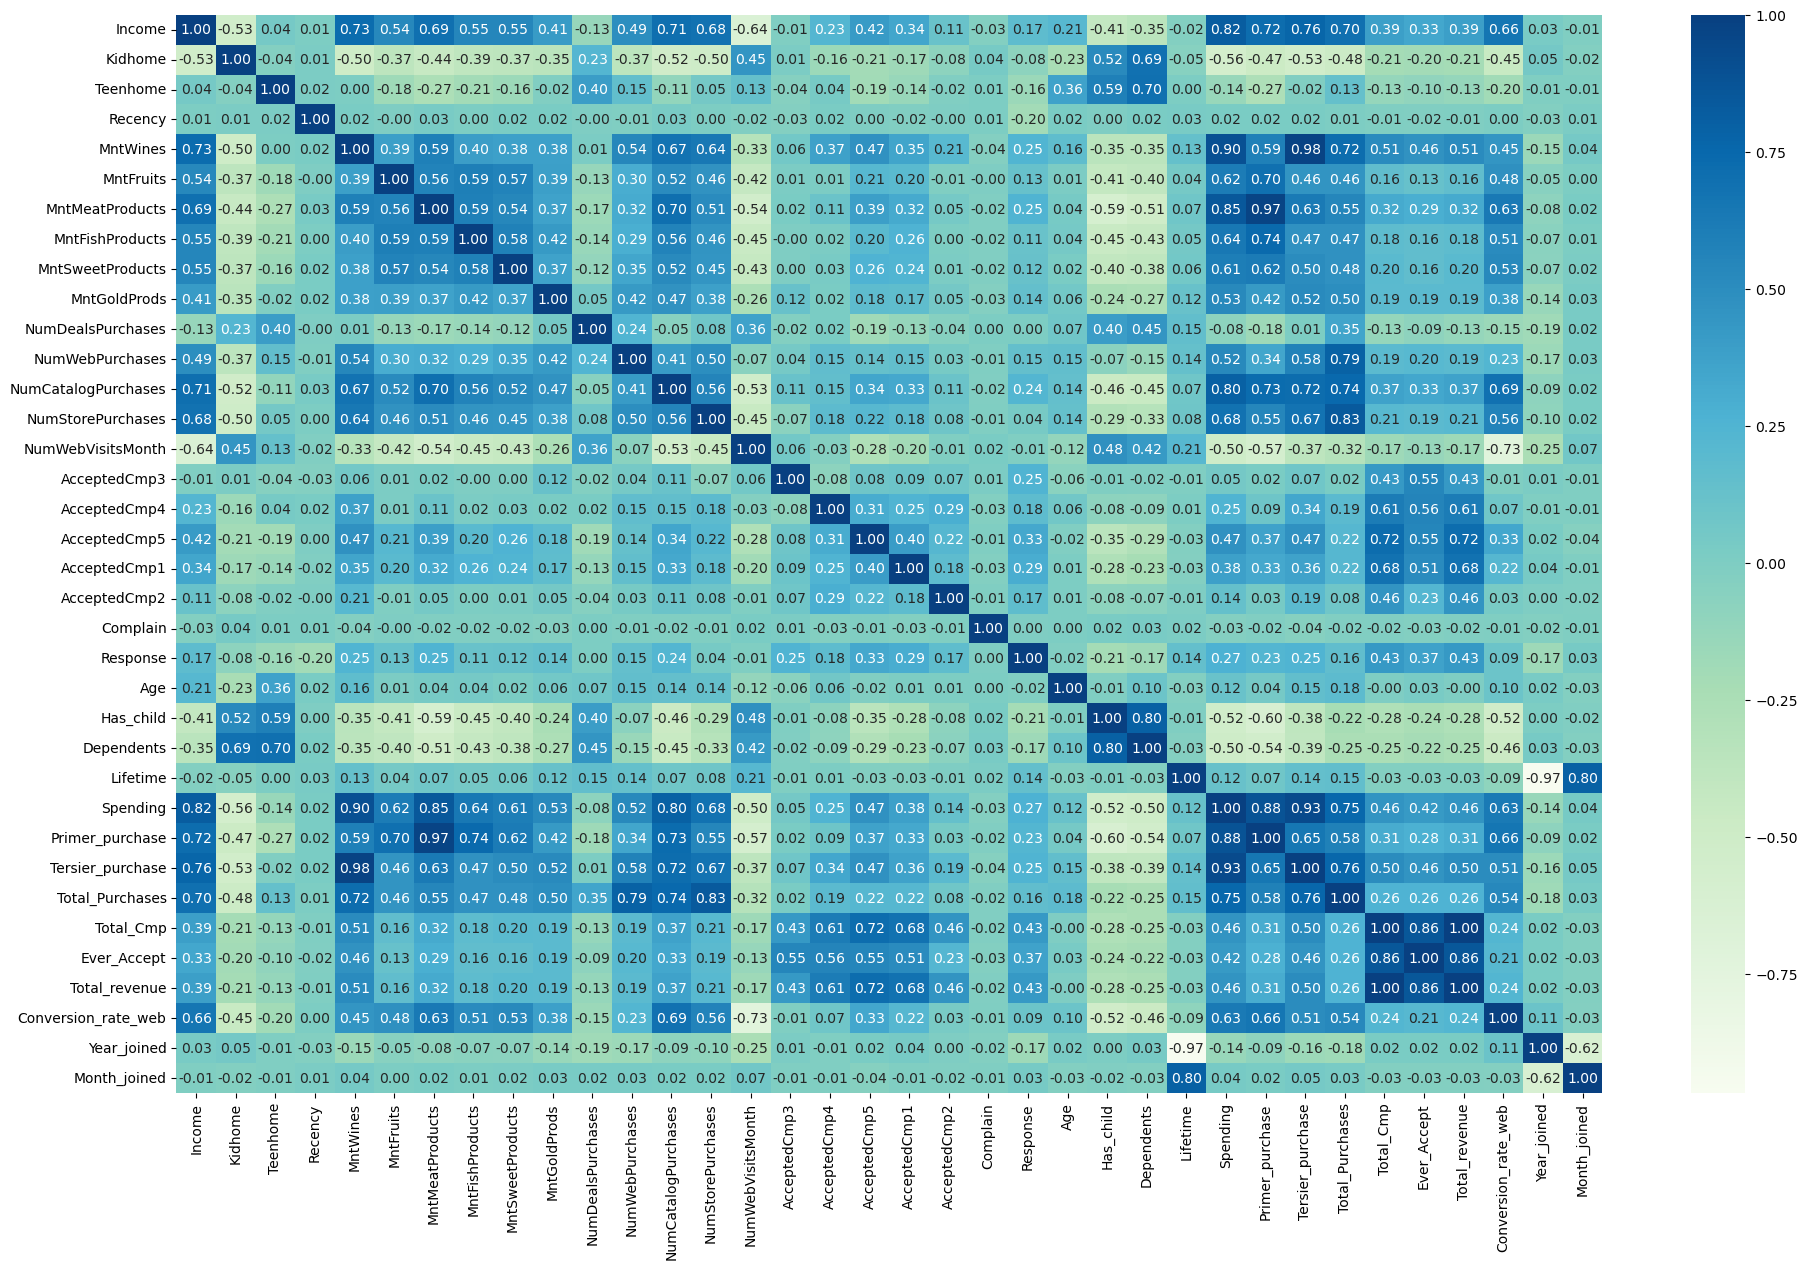

In [51]:
# Heatmap Korelasi (Pearson Correlation)
plt.figure(figsize=(23, 14))
sns.heatmap(df_new.corr(), cmap='GnBu', annot=True, fmt='.2f')

### Features Selection 2

### Handling Imbalance